# Titanic: Machine Learning from Disaster from Kaggle Competition

My name is André Fernandes and in this notebook is presented my solution proposal for the competition.
Feel free to connect with me on LinkedIn and check out my other projects on GitHub:
- [LinkedIn](https://www.linkedin.com/in/andré-fernandes-868006207/)
- [GitHub](https://github.com/vBarFace)

Bellow, is the description of the competition and the link to main page if you want to check it for your self.

## Table of Contents
1. [Introduction](#Introduction)
2. [Data Description](#Data-Description)
3. [Exploratory Data Analysis (EDA)](#Exploratory-Data-Analysis-EDA)
4. [Data Preprocessing](#Data-Preprocessing)
5. [Modeling](#Modeling)
6. [Model Evaluation](#Model-Evaluation)
7. [Conclusion](#Conclusion)
8. [References](#References)

## Introduction
The Titanic dataset is a classic machine learning dataset from the Titanic disaster in 1912. This notebook will guide you through the process of building a predictive model that answers the question: "What sorts of people were more likely to survive?" using passenger data (such as age, gender, class, etc.).

This competition is hosted on [Kaggle](https://www.kaggle.com/competitions/titanic/overview).
Also, there is a tutorial link that might be useful. Click [here!](https://www.kaggle.com/code/alexisbcook/titanic-tutorial)

## Data Description
The dataset consists of two files:
- `train.csv`: The training dataset
- `test.csv`: The test dataset

### Data Dictionary
- **PassengerId**: Unique ID for each passenger
- **Survived**: Survival (0 = No, 1 = Yes)
- **Pclass**: Ticket class (1 = 1st, 2 = 2nd, 3 = 3rd)
- **Name**: Name of the passenger
- **Sex**: Gender
- **Age**: Age in years
- **SibSp**: Number of siblings/spouses aboard the Titanic
- **Parch**: Number of parents/children aboard the Titanic
- **Ticket**: Ticket number
- **Fare**: Passenger fare
- **Cabin**: Cabin number
- **Embarked**: Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)

## Exploratory Data Analysis (EDA)
In this section, we will perform exploratory data analysis to uncover patterns and insights in the dataset. We will visualize the distribution of various features and their relationships with the target variable (Survived).

## Data Preprocessing
Data preprocessing steps include:
- Handling missing values
- Encoding categorical variables
- Feature engineering
- Scaling numerical features

## Modeling
We will build several machine learning models to predict the survival of passengers. The models we will consider include:
- Logistic Regression
- Decision Tree
- Naive Bayes
- Random Forest
- Support Vector Classifier
- K-Nearest Neighbors
- Soft Voting Classifier
- Xtreme Gradient Boosting

## Model Evaluation
We will evaluate the performance of the models using appropriate metrics such as accuracy, precision, recall, and F1-score. We will also use cross-validation to ensure the robustness of our models.

## Conclusion
Summarize the findings from the EDA, preprocessing, and modeling sections. Discuss the performance of the different models and suggest potential improvements.

## References
- Kaggle Titanic Competition: [Kaggle Titanic Competition](https://www.kaggle.com/competitions/titanic/overview)
- ChatGPT
- Inspired and guided by this [YouTube vídeo.](https://www.youtube.com/watch?v=I3FBJdiExcg&t=1822s&ab_channel=KenJee)

# ----- Beginning of my Solution Proposal -----
###### Usage:
Create a folder named "Titanic_Machine_Learning_from_Disaster" and get the "titanic" folder (given by kaggle that is the dataset) inside of "Titanic_Machine_Learning_from_Disaster". If you need to do some installs, create a cell bellow this one and install whats needed :)

In [3]:
# !pip install xgboost

### Imports

In [5]:
# Manipulate data
import numpy as np
import pandas as pd
# For visualization
import matplotlib.pyplot as plt
import seaborn as sns
# For data processing
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
# Model Building
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier
# For model evaluation
from sklearn.metrics import classification_report, confusion_matrix

### Get the data

In [7]:
# Lets get the training data
train_data = pd.read_csv("../Titanic_Machine_Learning_from_Disaster/titanic/train.csv")
test_data = pd.read_csv("../Titanic_Machine_Learning_from_Disaster/titanic/test.csv")

### Lets performe exploratory Data Analysis (EDA) - TRAINING DATA

In [9]:
# Lets see some information of the training set data
train_data.info()

'''
Conclusion:
    -> 'Age', 'Cabin' and 'Embarked' have NaN/Null values wich maybe need to be processed
    -> 'Name', 'Sex', 'Ticket', 'Cabin' and 'Embarked' are object type wich means that they need to be encoded 
'''

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


"\nConclusion:\n    -> 'Age', 'Cabin' and 'Embarked' have NaN/Null values wich maybe need to be processed\n    -> 'Name', 'Sex', 'Ticket', 'Cabin' and 'Embarked' are object type wich means that they need to be encoded \n"

In [10]:
# Lets see some of the data of the training set
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [11]:
# Now lets see some of the tendencies of the data
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [12]:
# Now lets separate the numerical and categorical features
numerical_features = train_data[['Age', 'SibSp' ,'Parch' ,'Fare']]
categorical_features = train_data[['Survived', 'Pclass' ,'Sex' ,'Ticket', 'Cabin', 'Embarked']]

##### Numerical Features

C:\Users\andre\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\andre\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\andre\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\andre\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

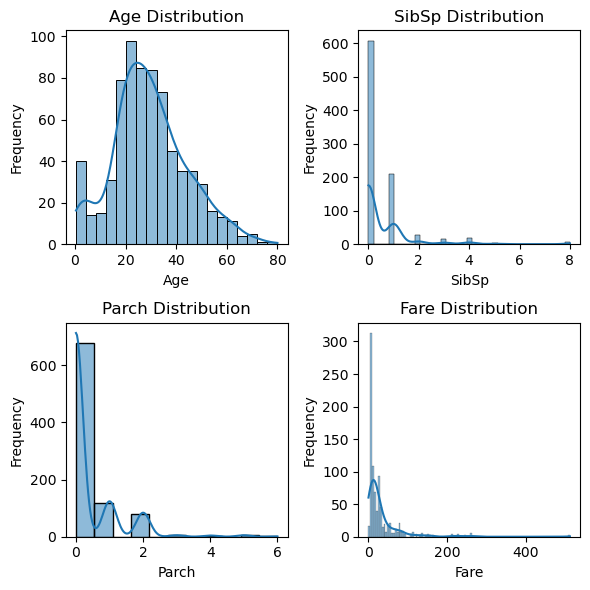

"\nConclusion:\n    -> 'Age' follows an aproximated normal distribution\n    -> 'SibSp' and 'Parch' have multiple categories so problably normalization does not matter\n    -> 'Fare' might need to be normalized because there is  a big spike at the beggining\n"

In [14]:
# Lets visualize the numerical values and its distribuition
fig, axes = plt.subplots(2, 2, figsize=(6, 6))

for i, feature in enumerate(numerical_features.columns, 1):
    plt.subplot(2, 2, i)
    sns.histplot(train_data[feature], kde=True)
    plt.title(f'{feature} Distribution')
    plt.xlabel(feature)
    plt.ylabel('Frequency')

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()

'''
Conclusion:
    -> 'Age' follows an aproximated normal distribution
    -> 'SibSp' and 'Parch' have multiple categories so problably normalization does not matter
    -> 'Fare' might need to be normalized because there is  a big spike at the beggining
'''

Correlation between the numerical features: 
             Age     SibSp     Parch      Fare
Age    1.000000 -0.308247 -0.189119  0.096067
SibSp -0.308247  1.000000  0.414838  0.159651
Parch -0.189119  0.414838  1.000000  0.216225
Fare   0.096067  0.159651  0.216225  1.000000


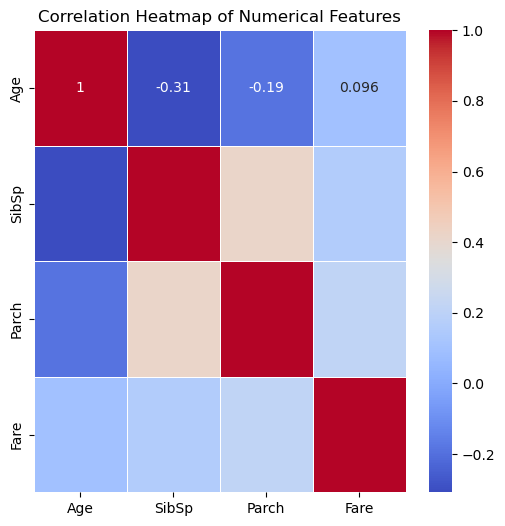

"\nConclusion:\n    -> 'SibSp' and 'Parch' have the biggest correlatio because familes tend to travel together\n    -> The rest are not correlated t all\n"

In [15]:
# Now its time to see some correlation of this numerical features
numerical_features_correlations = numerical_features.corr()
print("Correlation between the numerical features: \n", numerical_features_correlations)

# Lets plot a heatmap
plt.figure(figsize=(6, 6))
sns.heatmap(numerical_features_correlations, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

'''
Conclusion:
    -> 'SibSp' and 'Parch' have the biggest correlatio because familes tend to travel together
    -> The rest are not correlated t all
'''

In [16]:
# Finaly we will see what are the survival rattings of each nnumerical feature
print(pd.pivot_table(train_data, index = 'Survived', values = ['Age', 'SibSp' ,'Parch' ,'Fare']))

'''
Conclusion:
    -> The average age of survival is 28 and avearge age of dying is 30
    -> The average fare payed for people that survived id 48 and 22 for dying
    -> People who have parents a bord have more tendencies to survive
    -> People who have siblings a bord have more tendencis to die
'''

                Age       Fare     Parch     SibSp
Survived                                          
0         30.626179  22.117887  0.329690  0.553734
1         28.343690  48.395408  0.464912  0.473684


'\nConclusion:\n    -> The average age of survival is 28 and avearge age of dying is 30\n    -> The average fare payed for people that survived id 48 and 22 for dying\n    -> People who have parents a bord have more tendencies to survive\n    -> People who have siblings a bord have more tendencis to die\n'

##### Categorical Features

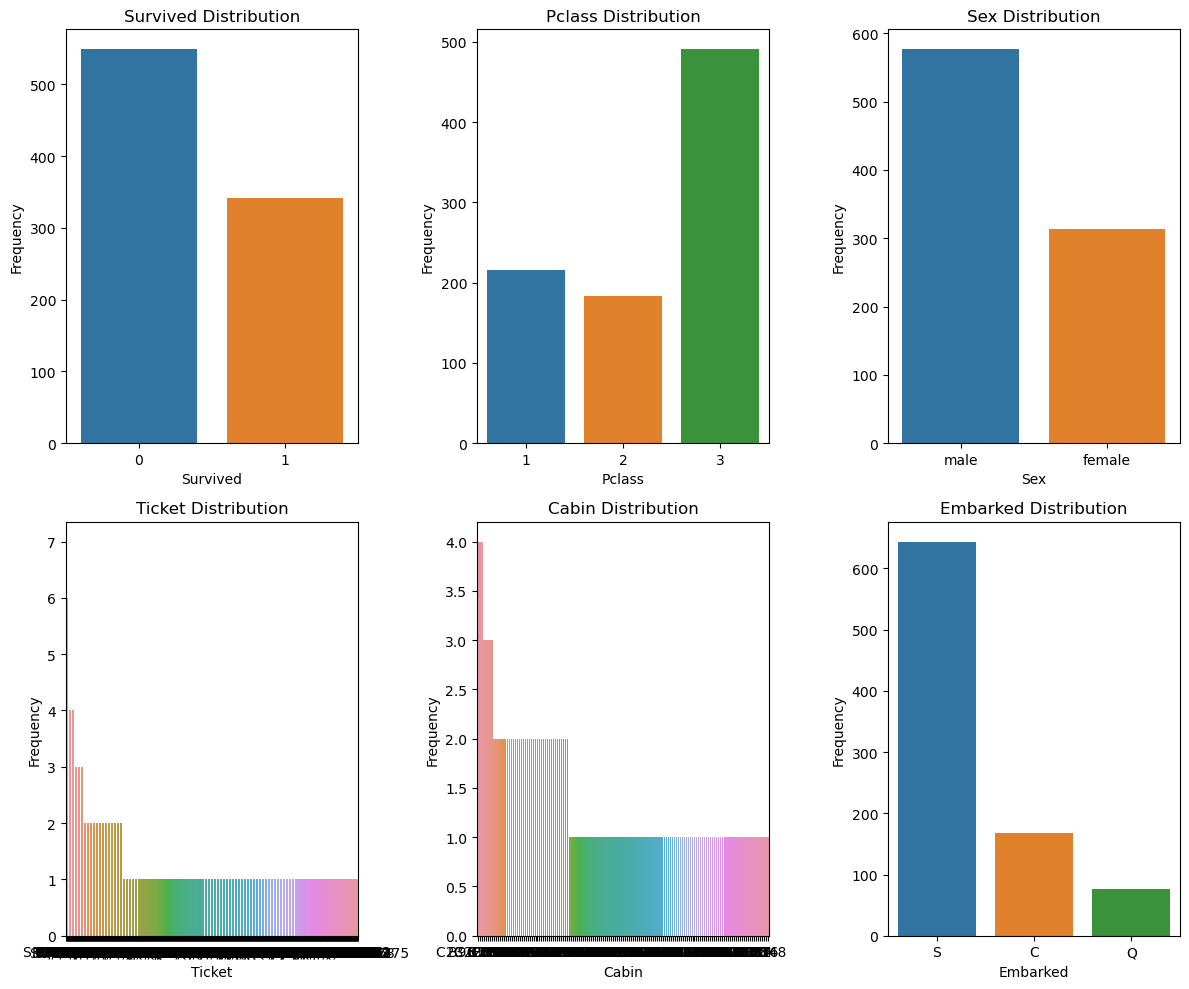

In [18]:
# Lets visualize the numerical values and its distribuition
fig, axes = plt.subplots(2, 3, figsize=(12, 10))

for i, feature in enumerate(categorical_features.columns, 1):
    plt.subplot(2, 3, i)
    sns.barplot(x=categorical_features[feature].value_counts().index,
                y=categorical_features[feature].value_counts())
    plt.title(f'{feature} Distribution')
    plt.xlabel(feature)
    plt.ylabel('Frequency')

# Adjust the layout
plt.tight_layout()
plt.show()

In [19]:
# Lets make the table where we see what are the survival rattings for each class of each feaure
# Note: to know the numbers, we will count the occurencies of the tickets

print(pd.pivot_table(train_data, index = 'Survived', columns = 'Pclass', values = 'Ticket', aggfunc = 'count'))
print()
print(pd.pivot_table(train_data, index = 'Survived', columns = 'Sex', values = 'Ticket', aggfunc = 'count'))
print()
print(pd.pivot_table(train_data, index = 'Survived', columns = 'Embarked', values = 'Ticket', aggfunc = 'count'))

Pclass      1   2    3
Survived              
0          80  97  372
1         136  87  119

Sex       female  male
Survived              
0             81   468
1            233   109

Embarked   C   Q    S
Survived             
0         75  47  427
1         93  30  217


### Lets performe exploratory Data Analysis (EDA) - TESTING DATA

In [21]:
test_data.info()

'''
Conclusion:
    -> 'Age', , 'Fare' and 'Cabin' have NaN/Null values wich maybe need to be processed
    -> 'Name', 'Sex', 'Ticket', 'Cabin' and 'Embarked' are object type wich means that they need to be encoded 
'''

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


"\nConclusion:\n    -> 'Age', , 'Fare' and 'Cabin' have NaN/Null values wich maybe need to be processed\n    -> 'Name', 'Sex', 'Ticket', 'Cabin' and 'Embarked' are object type wich means that they need to be encoded \n"

In [22]:
# Lets see some of the data of the testing set
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [23]:
# Now lets see some of the tendencies of the data
test_data.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


### Data Preprocessing
Data Exploration / Feature Engineering

#### Cabin

In [26]:
# Lets see the cabin data
print("Lets see the data about Cabin: \n", categorical_features.Cabin)
# Create a new feature where we see how many cabins people had
train_data['n_Cabins'] = train_data.Cabin.apply(lambda x: 0 if pd.isna(x) else len(x.split(' ')))

print()

# Lets see the feature
print("Lets see the number of cabins per person:")
train_data['n_Cabins'].value_counts()

print()

# Now lets investigate in realtion to survival
print(pd.pivot_table(train_data, index = 'Survived', columns = 'n_Cabins', values = 'Ticket', aggfunc = 'count'))

Lets see the data about Cabin: 
 0       NaN
1       C85
2       NaN
3      C123
4       NaN
       ... 
886     NaN
887     B42
888     NaN
889    C148
890     NaN
Name: Cabin, Length: 891, dtype: object

Lets see the number of cabins per person:

n_Cabins      0      1    2    3    4
Survived                             
0         481.0   58.0  7.0  3.0  NaN
1         206.0  122.0  9.0  3.0  2.0


In [27]:
# Now lets see in wich letter they people are in
train_data['Cabin_Type'] = train_data.Cabin.apply(lambda x: str(x)[0]) # Create a new feature

print()

# Lets see the feature
print("Lets see the Cabin_Type per person:")
print(train_data['Cabin_Type'].value_counts())

print()

# Now lets investigate in realtion to survival
print(pd.pivot_table(train_data, index = 'Survived', columns = 'Cabin_Type', values = 'Ticket', aggfunc = 'count'))


Lets see the Cabin_Type per person:
Cabin_Type
n    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: count, dtype: int64

Cabin_Type    A     B     C     D     E    F    G    T      n
Survived                                                     
0           8.0  12.0  24.0   8.0   8.0  5.0  2.0  1.0  481.0
1           7.0  35.0  35.0  25.0  24.0  8.0  2.0  NaN  206.0


#### Ticket

In [29]:
# Lets understand tickets: some of them have only numbers and onthers have numbers and letters
train_data['Ticket_Type'] = train_data.Ticket.apply(lambda x: 1 if x.isnumeric() else 0) # Create a new feature

print()

# Lets see the feature
print("Lets see the Ticket_Type per person:")
print(train_data['Ticket_Type'].value_counts())

print()

# Now lets investigate in realtion to survival
print(pd.pivot_table(train_data, index = 'Survived', columns = 'Ticket_Type', values = 'Ticket', aggfunc = 'count'))


Lets see the Ticket_Type per person:
Ticket_Type
1    661
0    230
Name: count, dtype: int64

Ticket_Type    0    1
Survived             
0            142  407
1             88  254


In [30]:
# Lets see the letters to see iff there is some patter
train_data['Ticket_Type_Letters'] = train_data.Ticket.apply(
    lambda x: ''.join(x.split(' ')[-1]).replace('.', '').replace('/', '').lower() if len(x.split(' ')[-1]) > 0 else 0)

print()

# Lets see the feature
print("Lets see the Ticket_Type_Letters per person:")
print(train_data['Ticket_Type_Letters'].value_counts())

print()

# Now lets investigate in realtion to survival
print(pd.pivot_table(train_data, index = 'Survived', columns = 'Ticket_Type_Letters', values = 'Ticket', aggfunc = 'count'))


Lets see the Ticket_Type_Letters per person:
Ticket_Type_Letters
2343       7
347082     7
1601       7
3101295    6
2144       6
          ..
9234       1
19988      1
2693       1
17612      1
370376     1
Name: count, Length: 679, dtype: int64

Ticket_Type_Letters  10482  110152  110413  110465  110564  110813  111240  \
Survived                                                                     
0                      NaN     NaN     1.0     2.0     NaN     NaN     1.0   
1                      1.0     3.0     2.0     NaN     1.0     1.0     NaN   

Ticket_Type_Letters  111320  111361  111369  ...  7546  7552  7553  7598  \
Survived                                     ...                           
0                       1.0     NaN     NaN  ...   1.0   1.0   1.0   NaN   
1                       NaN     2.0     1.0  ...   NaN   NaN   NaN   1.0   

Ticket_Type_Letters  8471  8475  851  9234  9549  line  
Survived                                                
0                  

#### Name

In [32]:
# Lets analize the titles of the people on board
train_data['Name_Title'] = train_data.Name.apply(lambda x: x.split(',')[1].split('.')[0].strip()) # Create a new feature
print(train_data['Name_Title'])

print()

# Lets see the feature
print("Lets see the Name_Title per person:")
print(train_data['Name_Title'].value_counts())

print()

# Now lets investigate in realtion to survival
print(pd.pivot_table(train_data, index = 'Survived', columns = 'Name_Title', values = 'Ticket', aggfunc = 'count'))

0        Mr
1       Mrs
2      Miss
3       Mrs
4        Mr
       ... 
886     Rev
887    Miss
888    Miss
889      Mr
890      Mr
Name: Name_Title, Length: 891, dtype: object

Lets see the Name_Title per person:
Name_Title
Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
the Countess      1
Capt              1
Ms                1
Sir               1
Lady              1
Mme               1
Don               1
Jonkheer          1
Name: count, dtype: int64

Name_Title  Capt  Col  Don   Dr  Jonkheer  Lady  Major  Master   Miss  Mlle  \
Survived                                                                      
0            1.0  1.0  1.0  4.0       1.0   NaN    1.0    17.0   55.0   NaN   
1            NaN  1.0  NaN  3.0       NaN   1.0    1.0    23.0  127.0   2.0   

Name_Title  Mme     Mr   Mrs   Ms  Rev  Sir  the Countess  
Survived                       

### Data Preprocessing
Handling missing values, Scaling numerical features & Encoding categorical variables

In [34]:
# Lets create a new dataset for traning called: features_data
train_data.head() # Lets see all features we have

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,n_Cabins,Cabin_Type,Ticket_Type,Ticket_Type_Letters,Name_Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,n,0,21171,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,C,0,17599,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,n,0,3101282,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,C,1,113803,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,n,1,373450,Mr


In [35]:
# Lets select features
features_data = train_data[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'n_Cabins', 'Cabin_Type', 'Ticket_Type', 'Name_Title']]
# Lets create the target dataset: target_data
target_data = train_data[['Survived']]

features_data.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,n_Cabins,Cabin_Type,Ticket_Type,Name_Title
0,3,male,22.0,1,0,7.2500,S,0,n,0,Mr
1,1,female,38.0,1,0,71.2833,C,1,C,0,Mrs
2,3,female,26.0,0,0,7.9250,S,0,n,0,Miss
3,1,female,35.0,1,0,53.1000,S,1,C,1,Mrs
4,3,male,35.0,0,0,8.0500,S,0,n,1,Mr


In [36]:
# Now, lets make this tranformations on the test_data so we can have the same features
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [37]:
# First on the cabin
test_data['n_Cabins'] = test_data.Cabin.apply(lambda x: 0 if pd.isna(x) else len(x.split(' ')))
# Secound on the cabin type
test_data['Cabin_Type'] = test_data.Cabin.apply(lambda x: str(x)[0])
# Thirdly o ticket type
test_data['Ticket_Type'] = test_data.Ticket.apply(lambda x: 1 if x.isnumeric() else 0)
# Finally on Name type
test_data['Name_Title'] = test_data.Name.apply(lambda x: x.split(',')[1].split('.')[0].strip())

test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,n_Cabins,Cabin_Type,Ticket_Type,Name_Title
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0,n,1,Mr
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0,n,1,Mrs
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0,n,1,Mr
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0,n,1,Mr
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,0,n,1,Mrs


In [38]:
# Now, create the data that will make prediction
pred_data = test_data[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'n_Cabins', 'Cabin_Type', 'Ticket_Type', 'Name_Title']]
pred_data.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,n_Cabins,Cabin_Type,Ticket_Type,Name_Title
0,3,male,34.5,0,0,7.8292,Q,0,n,1,Mr
1,3,female,47.0,1,0,7.0000,S,0,n,1,Mrs
2,2,male,62.0,0,0,9.6875,Q,0,n,1,Mr
3,3,male,27.0,0,0,8.6625,S,0,n,1,Mr
4,3,female,22.0,1,1,12.2875,S,0,n,1,Mrs


In [39]:
# Lets chekc if both the training and testing have the same shape for the model
print("Shape of the Training data for the model (features_data): ", features_data.shape)
print("Shape of the Test data for the model (pred_data): ", pred_data.shape)

Shape of the Training data for the model (features_data):  (891, 11)
Shape of the Test data for the model (pred_data):  (418, 11)


In [40]:
# Now, in the trainig data we have 'Age' and 'Embarked' have NaN/Null

# Lets fill the NaN values of the age with the mean value
features_data.loc[:, 'Age'] = features_data['Age'].fillna(train_data['Age'].mean())

# Lets eleminate the rows of Embarked that have NaN/Null meaning that the person did not embaked
features_data = features_data.dropna(subset=['Embarked'])

In [41]:
# Now, in the test data we have 'Age' and  'Fare' with  NaN/Null values

# Lets fill the NaN values of the age with the mean value
pred_data.loc[:, 'Age'] = pred_data['Age'].fillna(test_data['Age'].mean())

# Lets fill the NaN values of the fare with the median value instead of mean because feare does not follow a normal distribution
pred_data.loc[:, 'Fare'] = pred_data['Fare'].fillna(test_data['Fare'].median())

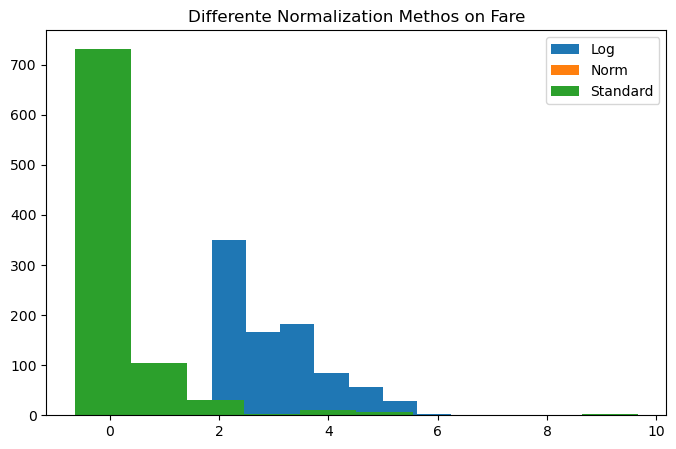

In [42]:
# Lets normalize the 'Fare' in diffeente ways and see wich is better
fare_log = np.log(features_data['Fare']+1) # +1 because there values = 0
scaler_Norm = MinMaxScaler()
fare_norm = scaler_Norm.fit_transform(features_data[['Fare']])
scaler_Standar = StandardScaler()
fare_stand = scaler_Standar.fit_transform(features_data[['Fare']])

plt.figure(figsize=(8, 5))
plt.hist(fare_log)
plt.hist(fare_norm)
plt.hist(fare_stand)
plt.title('Differente Normalization Methos on Fare')
plt.legend(['Log', 'Norm', 'Standard'])
plt.show()

In [43]:
# Lets normalize the 'Fare' with llog because its the one that is closer to normal distribution
features_data.loc[:, 'Fare'] = np.log(features_data['Fare'] + 1)
pred_data.loc[:, 'Fare'] = np.log(pred_data['Fare'] + 1)

print(features_data.info())
print(pred_data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Pclass       889 non-null    int64  
 1   Sex          889 non-null    object 
 2   Age          889 non-null    float64
 3   SibSp        889 non-null    int64  
 4   Parch        889 non-null    int64  
 5   Fare         889 non-null    float64
 6   Embarked     889 non-null    object 
 7   n_Cabins     889 non-null    int64  
 8   Cabin_Type   889 non-null    object 
 9   Ticket_Type  889 non-null    int64  
 10  Name_Title   889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Pclass       418 non-null    int64  
 1   Sex          418 non-null    object 
 2   Age     

In [44]:
# Now lets perform One-Hot-Encode in our categorical data
categorical_columns = ['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked', 'n_Cabins', 'Cabin_Type', 'Ticket_Type', 'Name_Title']
# Initialize OneHotEncoder
encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
# Fit encoder to categorical variables in training data
encoder.fit(features_data[categorical_columns])
# Transform training data
features_data_columns = encoder.transform(features_data[categorical_columns])
pred_data_columns = encoder.transform(pred_data[categorical_columns])
# Creat a new dataset
features_data_encoded = pd.DataFrame(features_data_columns, columns=encoder.get_feature_names_out(categorical_columns))
test_encoded_encoded = pd.DataFrame(pred_data_columns, columns=encoder.get_feature_names_out(categorical_columns))
# Concatenate with the rest of variables
features_data_encoded = pd.concat([features_data_encoded, features_data[['Age', 'Fare']]], axis=1)
test_encoded_encoded = pd.concat([test_encoded_encoded, pred_data[['Age', 'Fare']]], axis=1)

# For debuging on encoder creating null entries
print("Length of features_data_encoded:", len(features_data_encoded))
print("Length of features_data[['Age', 'Fare']]:", len(features_data[['Age', 'Fare']]))
print("Length of concatenated features_data_encoded:", len(features_data_encoded))

print(features_data_encoded.info())
features_data_encoded.head()

Length of features_data_encoded: 891
Length of features_data[['Age', 'Fare']]: 889
Length of concatenated features_data_encoded: 891
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 57 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Pclass_1                 889 non-null    float64
 1   Pclass_2                 889 non-null    float64
 2   Pclass_3                 889 non-null    float64
 3   Sex_female               889 non-null    float64
 4   Sex_male                 889 non-null    float64
 5   SibSp_0                  889 non-null    float64
 6   SibSp_1                  889 non-null    float64
 7   SibSp_2                  889 non-null    float64
 8   SibSp_3                  889 non-null    float64
 9   SibSp_4                  889 non-null    float64
 10  SibSp_5                  889 non-null    float64
 11  SibSp_8                  889 non-null    float64
 12  P

C:\Users\andre\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,SibSp_0,SibSp_1,SibSp_2,SibSp_3,SibSp_4,...,Name_Title_Mlle,Name_Title_Mme,Name_Title_Mr,Name_Title_Mrs,Name_Title_Ms,Name_Title_Rev,Name_Title_Sir,Name_Title_the Countess,Age,Fare
0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,22.0,2.110213
1,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,38.0,4.280593
2,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,26.0,2.188856
3,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,35.0,3.990834
4,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,35.0,2.202765


In [45]:
print(test_encoded_encoded.info())
test_encoded_encoded.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 57 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Pclass_1                 418 non-null    float64
 1   Pclass_2                 418 non-null    float64
 2   Pclass_3                 418 non-null    float64
 3   Sex_female               418 non-null    float64
 4   Sex_male                 418 non-null    float64
 5   SibSp_0                  418 non-null    float64
 6   SibSp_1                  418 non-null    float64
 7   SibSp_2                  418 non-null    float64
 8   SibSp_3                  418 non-null    float64
 9   SibSp_4                  418 non-null    float64
 10  SibSp_5                  418 non-null    float64
 11  SibSp_8                  418 non-null    float64
 12  Parch_0                  418 non-null    float64
 13  Parch_1                  418 non-null    float64
 14  Parch_2                  4

,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,SibSp_0,SibSp_1,SibSp_2,SibSp_3,SibSp_4,...,Name_Title_Mlle,Name_Title_Mme,Name_Title_Mr,Name_Title_Mrs,Name_Title_Ms,Name_Title_Rev,Name_Title_Sir,Name_Title_the Countess,Age,Fare
0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,34.5,2.178064
1,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,47.0,2.079442
2,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,62.0,2.369075
3,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,27.0,2.268252
4,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,22.0,2.586824


In [46]:
# Now lets perform scalling on the 'Age' and 'Fare'. Since theuy now both follow normal distribution we use StandardScaler()
features_data_encoded['Age'] = scaler_Standar.fit_transform(features_data_encoded[['Age']])
features_data_encoded['Fare'] = scaler_Standar.fit_transform(features_data_encoded[['Fare']])

features_data_encoded.head()

,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,SibSp_0,SibSp_1,SibSp_2,SibSp_3,SibSp_4,...,Name_Title_Mlle,Name_Title_Mme,Name_Title_Mr,Name_Title_Mrs,Name_Title_Ms,Name_Title_Rev,Name_Title_Sir,Name_Title_the Countess,Age,Fare
0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,-0.590495,-0.877591
1,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.643971,1.366380
2,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.281878,-0.796281
3,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.412509,1.066796
4,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.412509,-0.781901


In [47]:
test_encoded_encoded['Age'] = scaler_Standar.fit_transform(test_encoded_encoded[['Age']])
test_encoded_encoded['Fare'] = scaler_Standar.fit_transform(test_encoded_encoded[['Fare']])

test_encoded_encoded.head()

,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,SibSp_0,SibSp_1,SibSp_2,SibSp_3,SibSp_4,...,Name_Title_Mlle,Name_Title_Mme,Name_Title_Mr,Name_Title_Mrs,Name_Title_Ms,Name_Title_Rev,Name_Title_Sir,Name_Title_the Countess,Age,Fare
0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.334993,-0.867031
1,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.325530,-0.969149
2,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2.514175,-0.669252
3,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,-0.259330,-0.773647
4,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,-0.655545,-0.443786


### Modeling

In [49]:
# Because the encoder created null entries, we need to remove them
null_indices = features_data_encoded.index[features_data_encoded.isnull().any(axis=1)]
null_columns = features_data_encoded.columns[features_data_encoded.isnull().any()]

print("DataFrame:")
print(features_data_encoded)
print("\nIndices with null entries:")
print(null_indices)

DataFrame:
     Pclass_1  Pclass_2  Pclass_3  Sex_female  Sex_male  SibSp_0  SibSp_1  \
0         0.0       0.0       1.0         0.0       1.0      0.0      1.0   
1         1.0       0.0       0.0         1.0       0.0      0.0      1.0   
2         0.0       0.0       1.0         1.0       0.0      1.0      0.0   
3         1.0       0.0       0.0         1.0       0.0      0.0      1.0   
4         0.0       0.0       1.0         0.0       1.0      1.0      0.0   
..        ...       ...       ...         ...       ...      ...      ...   
886       0.0       0.0       1.0         1.0       0.0      0.0      1.0   
887       1.0       0.0       0.0         0.0       1.0      1.0      0.0   
888       0.0       0.0       1.0         0.0       1.0      1.0      0.0   
889       NaN       NaN       NaN         NaN       NaN      NaN      NaN   
890       NaN       NaN       NaN         NaN       NaN      NaN      NaN   

     SibSp_2  SibSp_3  SibSp_4  ...  Name_Title_Mlle  Name_Title

In [50]:
# Lets remove this lines from features and target
features_data_encoded = features_data_encoded.drop(null_indices)
target_data = target_data.drop(null_indices)
print("Shape of features_data_encoded: ", features_data_encoded.shape)
print("Shape of target_data: ", target_data.shape)
print(features_data_encoded.info())

Shape of features_data_encoded:  (887, 57)
Shape of target_data:  (887, 1)
<class 'pandas.core.frame.DataFrame'>
Index: 887 entries, 0 to 888
Data columns (total 57 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Pclass_1                 887 non-null    float64
 1   Pclass_2                 887 non-null    float64
 2   Pclass_3                 887 non-null    float64
 3   Sex_female               887 non-null    float64
 4   Sex_male                 887 non-null    float64
 5   SibSp_0                  887 non-null    float64
 6   SibSp_1                  887 non-null    float64
 7   SibSp_2                  887 non-null    float64
 8   SibSp_3                  887 non-null    float64
 9   SibSp_4                  887 non-null    float64
 10  SibSp_5                  887 non-null    float64
 11  SibSp_8                  887 non-null    float64
 12  Parch_0                  887 non-null    float64
 13  Parch_1   

In [51]:
# Lets use the trainig set and split it so we can have a portion of data labeled to test and evaluate our model
X_train, X_test, y_train, y_test = train_test_split(features_data_encoded, target_data, test_size=0.2) # Lets use 80% for train and 20% for evaluate

In [52]:
# Lets use Cross validation to see wich model is the best
n_cross_Val = 10
y_train_CV = np.ravel(y_train)

In [53]:
# Naive Bayes
model_Gauss_NB = GaussianNB()
cv_Gauss_NB = cross_val_score(model_Gauss_NB, X_train, y_train_CV, cv = n_cross_Val)
print("Score of each validation for GaussianNB: ", cv_Gauss_NB)
print("Mean Score of CV for GaussianNB: ", cv_Gauss_NB.mean())

Score of each validation for GaussianNB:  [0.4084507  0.46478873 0.42253521 0.42253521 0.3943662  0.4084507
 0.42253521 0.38028169 0.50704225 0.42857143]
Mean Score of CV for GaussianNB:  0.4259557344064387


In [54]:
# Logistic Regression
model_LogisticRegression = LogisticRegression()
cv_LogisticRegression = cross_val_score(model_LogisticRegression, X_train, y_train_CV, cv = n_cross_Val)
print("Score of each validation for LogisticRegression: ", cv_LogisticRegression)
print("Mean Score of CV for LogisticRegression: ", cv_LogisticRegression.mean())

Score of each validation for LogisticRegression:  [0.69014085 0.71830986 0.64788732 0.67605634 0.6056338  0.57746479
 0.64788732 0.70422535 0.66197183 0.71428571]
Mean Score of CV for LogisticRegression:  0.6643863179074446


In [55]:
# Decision Tree
model_DecisionTree = tree.DecisionTreeClassifier()
cv_DecisionTree = cross_val_score(model_DecisionTree, X_train, y_train_CV, cv = n_cross_Val)
print("Score of each validation for DecisionTree: ", cv_DecisionTree)
print("Mean Score of CV for DecisionTree: ", cv_DecisionTree.mean())

Score of each validation for DecisionTree:  [0.56338028 0.74647887 0.56338028 0.66197183 0.69014085 0.57746479
 0.6056338  0.6056338  0.57746479 0.7       ]
Mean Score of CV for DecisionTree:  0.6291549295774648


In [56]:
# K-Neighbors Classifier
model_KNeighbors = KNeighborsClassifier()
cv_KNeighbors = cross_val_score(model_KNeighbors, X_train, y_train_CV, cv = n_cross_Val)
print("Score of each validation for KNeighbors: ", cv_KNeighbors)
print("Mean Score of CV for KNeighbors: ", cv_KNeighbors.mean())

Score of each validation for KNeighbors:  [0.71830986 0.76056338 0.61971831 0.63380282 0.63380282 0.63380282
 0.6056338  0.66197183 0.63380282 0.65714286]
Mean Score of CV for KNeighbors:  0.6558551307847084


In [57]:
# RandomForest Classifier
model_RandomForest = RandomForestClassifier()
cv_RandomForest = cross_val_score(model_RandomForest, X_train, y_train_CV, cv = n_cross_Val)
print("Score of each validation for RandomForest: ", cv_RandomForest)
print("Mean Score of CV for RandomForest: ", cv_RandomForest.mean())

Score of each validation for RandomForest:  [0.69014085 0.67605634 0.56338028 0.67605634 0.63380282 0.56338028
 0.64788732 0.6056338  0.61971831 0.67142857]
Mean Score of CV for RandomForest:  0.6347484909456741


In [58]:
# Support Vector Classifier
model_SupportVectorClassifier = SVC(probability=True)
cv_SupportVectorClassifier = cross_val_score(model_SupportVectorClassifier, X_train, y_train_CV, cv = n_cross_Val)
print("Score of each validation for SupportVctorClassifier: ", cv_SupportVectorClassifier)
print("Mean Score of CV for SupportVectorClassifier: ", cv_SupportVectorClassifier.mean())

Score of each validation for SupportVctorClassifier:  [0.67605634 0.71830986 0.67605634 0.69014085 0.66197183 0.63380282
 0.71830986 0.71830986 0.69014085 0.7       ]
Mean Score of CV for SupportVectorClassifier:  0.6883098591549296


In [59]:
# XGB Classifier
model_XGBClassifier = XGBClassifier()
cv_XGBClassifier = cross_val_score(model_XGBClassifier, X_train, y_train_CV, cv = n_cross_Val)
print("Score of each validation for XGBClassifier: ", cv_XGBClassifier)
print("Mean Score of CV for XGBClassifier: ", cv_XGBClassifier.mean())

Score of each validation for XGBClassifier:  [0.66197183 0.67605634 0.6056338  0.71830986 0.6056338  0.64788732
 0.66197183 0.66197183 0.67605634 0.67142857]
Mean Score of CV for XGBClassifier:  0.658692152917505


In [60]:
# Lets know chose the best classifier using cross_val_score also
classifier_voting = VotingClassifier(estimators =[
    ('GNB', model_Gauss_NB),
    ('LR', model_LogisticRegression),
    ('DT', model_DecisionTree),
    ('KNC', model_KNeighbors),
    ('RFC', model_RandomForest),
    ('SVC', model_SupportVectorClassifier),
    ('XGBC', model_XGBClassifier)
], voting = 'soft')

In [61]:
# The best classifier
cv_Best = cross_val_score(classifier_voting, X_train, y_train_CV, cv = n_cross_Val)
print("Score of best Classifier: ", cv_Best)
print("Mean Score of best Classifier: ", cv_Best.mean())

Score of best Classifier:  [0.61971831 0.71830986 0.6056338  0.73239437 0.61971831 0.63380282
 0.69014085 0.63380282 0.69014085 0.77142857]
Mean Score of best Classifier:  0.6715090543259558


### Lets perform Model Evaluation

In [63]:
# Lets fit the model
classifier_voting.fit(X_train, y_train_CV)
# Lets make a prediction
y_pred = classifier_voting.predict(X_test)

# Lets evaluate the Logistic Regression model by making a prediction
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.62      0.65       111
           1       0.46      0.54      0.50        67

    accuracy                           0.59       178
   macro avg       0.58      0.58      0.58       178
weighted avg       0.60      0.59      0.59       178

Confusion Matrix:
[[69 42]
 [31 36]]


### Lets get the submission file

In [65]:
# Make the prediciton on the test_data
pred_classifier_voting = classifier_voting.predict(test_encoded_encoded)

output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': pred_classifier_voting})
output.to_csv('submission_ClassifierVoting.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!
